### Univariate Linear Regression

#### Loading of Data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
url = 'https://raw.githubusercontent.com/Benlau93/Machine-Learning-by-Andrew-Ng-in-Python/master/LinearRegression/Uni_linear.txt'
data = pd.read_csv(url,header=None)

In [4]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
data.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


#### Ploting of Data

Text(0.5, 1.0, 'Profit Prediction')

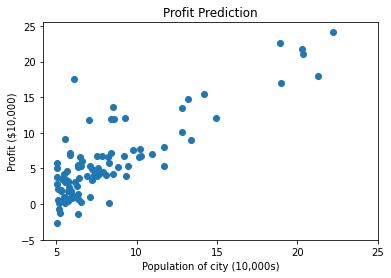

In [6]:
plt.scatter(data[0],data[1])
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,5))
plt.xlabel("Population of city (10,000s)")
plt.ylabel("Profit ($10,000)")
plt.title("Profit Prediction")

# Gredient descent

Minimize the cost function J($\theta$)

By updating Equation and repeat until convergence

$   {1\div2 /} $

$ \theta_j = \theta_j - \alpha* (\partial/\partial\theta_j)J(\theta_0 , \theta_1)    $

$ \theta_j := \theta_j - \alpha(1/m) \sum \limits _{i=1}^{m}(h_\theta (x^{(i)}) - y^{(i)}) x_j ^{(i)}  $

## Cost Function

$ J(\theta) = (1/2m) \sum \limits _{i=1} ^{m} (h_\theta (x^{(i)}) - y^{(i)})^2 $

#####  hypothesis

$ h_\theta (x) = \theta_0 + \theta_1 x $

In [7]:
df = data.copy() 

In [8]:
df.columns = ['x','y']

In [9]:
df.head()

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [10]:
df.shape

(97, 2)

In [11]:
x = df['x'].values

In [12]:
x0 = np.ones(len(x))

In [13]:
X = np.array([x0,x]).T

In [14]:
X.shape

(97, 2)

In [15]:
theta = np.zeros((2))

In [16]:
theta.shape

(2,)

Hypothesis: 
$ h_\theta (x) = \theta_0 + \theta_1 x $

In [17]:
def hypothesis(X,theta):
    hypoth = np.dot(X,theta)
    return hypoth

In [18]:
### Checking for any theta 
theta = np.array([1,2])
htheta = hypothesis(X,theta)
htheta

array([13.2202, 12.0554, 18.0372, 15.0064, 12.7196, 17.7658, 15.9528,
       18.1562, 13.9724, 11.1092, 12.4214, 29.328 , 12.468 , 17.8168,
       12.2814, 11.7588, 13.7308, 11.2602, 13.8592, 15.1416, 13.3782,
       41.54  , 11.9802, 13.6522, 12.1298, 38.89  , 26.656 , 22.914 ,
       27.352 , 45.406 , 11.5048, 14.1788, 19.4964, 12.7836, 17.4222,
       16.8668, 17.1918, 12.2126, 26.672 , 13.7068, 11.8138, 14.765 ,
       24.416 , 12.5474, 16.6494, 15.1862, 11.1404, 12.6028, 24.4   ,
       12.0832, 16.0804, 11.6154, 15.8478, 16.2062, 13.6656, 13.7178,
       13.5484, 12.2794, 19.6204, 19.9072, 18.6508, 11.3586, 43.558 ,
       30.816 , 38.918 , 15.4364, 17.5902, 21.472 , 11.9988, 41.682 ,
       21.272 , 15.669 , 13.0124, 15.4518, 11.0538, 14.0958, 16.0772,
       11.073 , 21.548 , 11.2154, 12.4584, 11.3768, 13.7114, 20.5374,
       14.0318, 18.0344, 19.3604, 13.004 , 12.0408, 11.1188, 12.4154,
       16.2732, 12.7414, 11.6108, 17.5868, 27.788 , 11.8738])

Cost Function : 
$ J(\theta) = (1/2m) \sum \limits _{i=1} ^{m} (h_\theta (x^{(i)}) - y^{(i)})^2 $

In [19]:
def CostFunction(X,y,theta):
    m = len(y)
    prediction = hypothesis(X,theta)  # htheta
    square_err = (prediction - y)**2     # jtheta
    sum_sq_err = square_err.sum()/(2*m)
    return sum_sq_err 

In [20]:
# Checking 
y = df['y'].values
theta = np.array([-1,-2])
jtheta = CostFunction(X,y,theta)
jtheta

348.1970540642391

Gradient Descent :
$ \theta_j := \theta_j - \alpha(1/m) \sum \limits _{i=1}^{m}(h_\theta (x^{(i)}) - y^{(i)}) x_j ^{(i)}  $

In [21]:
def gradientDescent(X,y,theta,alpha,num_iters):
    '''
    Taking in numy array X, y and theta and update theta by taking num_iters gradient step
    with learning rate of alpha
    return theta and the list of cost of theta during each iteration'''
    
    m = len(y)
    thitas =[]
    error=[]
    theta = np.zeros((2))
    for i in range(num_iters):
        htheta = hypothesis(X,theta)
        
        
        descent  = alpha*(np.dot((htheta-y),X)/m)
        theta = theta - descent
        thitas.append(theta[1])
        jtheta = CostFunction(X,y,theta)
        
        error.append(jtheta)
    return theta, error, thitas

In [22]:
iteration = 1500
alpha = 0.01

In [23]:
theta,error,thitas = gradientDescent(X,y,theta,alpha,iteration)

In [24]:
print("h(x) = "+str(round(theta[0],2))+" + "+str(round(theta[1],2))+"x1")

h(x) = -3.63 + 1.17x1


### Testing the Implementation

Text(0.5, 1.0, 'Cost Function uising Gradient Descent')

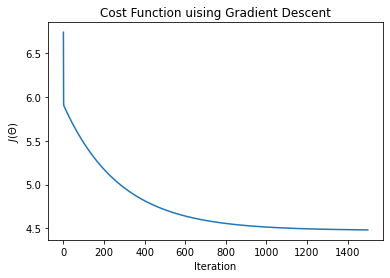

In [25]:
plt.plot(error)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost Function uising Gradient Descent")

In [31]:
import matplotlib as mpl
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# Generating value of theta0, theta1 and resulting cost value
theta0_vals = np.linspace(-10,10,100)
theta1_vals = np.linspace(-1,4,100)
j_vals = np.zeros((len(theta0_vals),len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i],theta1_vals[j]])
        j_vals[i,j]=CostFunction(X,y,t)

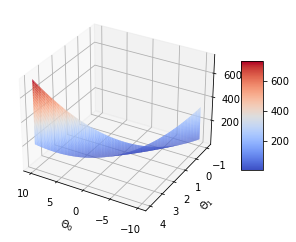

In [53]:
# Generating the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
surf = ax.plot_surface(theta0_vals,theta1_vals,j_vals,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5,aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta$")

# Rorate for better angle
ax.view_init(30,120)